In [339]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

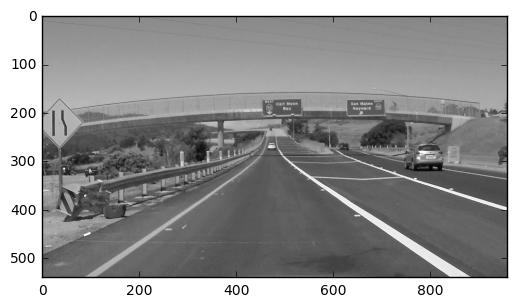

In [340]:
# Read in and grayscale the image
image = mpimg.imread('exit-ramp.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

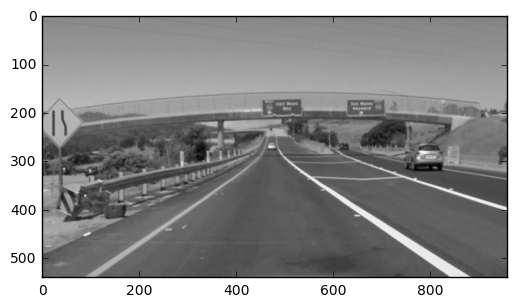

In [341]:
# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
plt.imshow(blur_gray, cmap='gray')
plt.show()

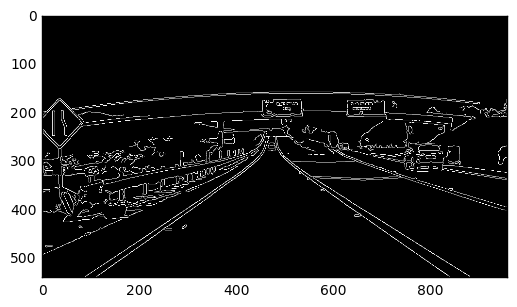

In [342]:
# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
plt.imshow(edges, cmap='gray')
plt.show()

In [343]:
# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)   
mask_color = 255

(540, 960, 3)
[[  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]
 ..., 
 [  0   0   0 ...,   0   0   0]
 [  0   0 255 ..., 255 255   0]
 [  0 255 255 ..., 255 255 255]]


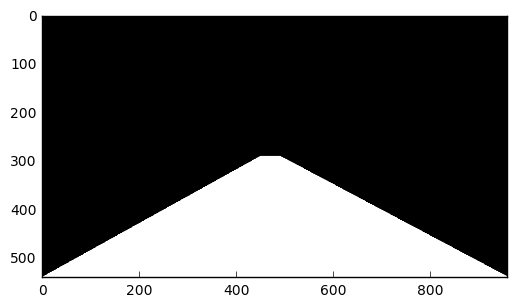

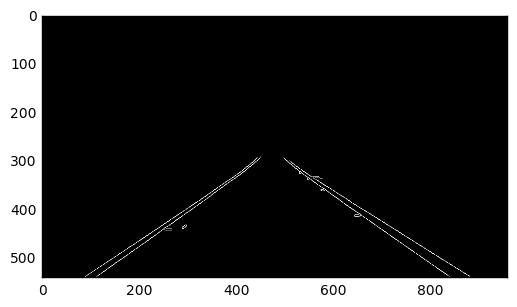

In [344]:
# This time we are defining a four sided polygon to mask
imshape = image.shape
print(imshape)
# vertices = np.array([[(0,imshape[0]),(0, 0), (imshape[1], 0), (imshape[1],imshape[0])]], dtype=np.int32)
# cheating a little, bit ...
vertices = np.array([[(0,imshape[0]),(450, 290), (490, 290), (imshape[1],imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, mask_color)
print(mask)
plt.imshow(mask, cmap='gray')
plt.show()
masked_edges = cv2.bitwise_and(edges, mask)
plt.imshow(masked_edges, cmap='gray')
plt.show()

In [345]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 270     # minimum number of votes (intersections in Hough grid cell)
min_line_length = 40 #minimum number of pixels making up a line
max_line_gap = 30    # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on

In [346]:
# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

In [347]:
# Iterate over the output "lines" and draw lines on a blank image
print(lines.shape)
for line in lines:
    print(line)
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

(3, 1, 4)
[[522 316 839 538]]
[[ 92 537 442 301]]
[[560 337 881 538]]


In [348]:
# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges))

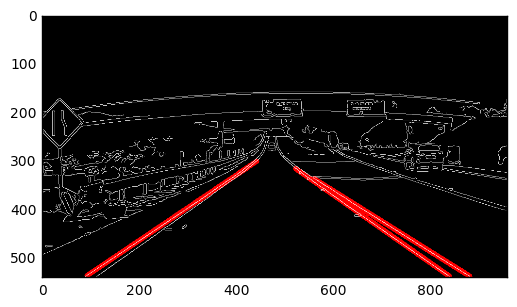

In [349]:
# Draw the lines on the edge image
lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(lines_edges)
plt.show()

#### Proposed settings 
I went with a low_threshold of 50 and high_threshold of 150 for Canny edge detection.

For region selection, I defined vertices = np.array([[(0,imshape[0]),(450, 290), (490, 290), (imshape[1],imshape[0])]], dtype=np.int32)

I chose parameters for my Hough space grid to be a rho of 2 pixels and theta of 1 degree (pi/180 radians). I chose a threshold of 15, meaning at least 15 points in image space need to be associated with each line segment. I imposed a min_line_length of 40 pixels, and max_line_gap of 20 pixels. 